## Sentiment analyse twitter

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re

### We load an explore our labeled dataset 

labeld training set can be download from:http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

In [3]:
##This chunck is for reading in the train and test data, including a little bit of exploratory.

cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("C:\\Users\\Jeffr\\Downloads\\training.1600000.processed.noemoticon.csv",header=None, names=cols,encoding="ISO-8859–1")
#df = pd.read_csv("Datafiles\\training.1600000.processed.noemoticon.csv",header=None, names=cols,encoding="ISO-8859–1")
# above line will be different depending on where you saved your data, and your file name
df.head()
df.drop(['id','date','query_string','user'],axis=1,inplace=True) ## Drop the rows that we dont need
df[df.sentiment == 4].head(10) ## Show some rows of sentiment 4 , looks like 4 is positive


,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [4]:
df[df.sentiment == 0].head(10) ## Show some rows of sentiment 0, looks like 0 is negative

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [5]:
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1}) ## Map indicater 4 to 1
df.sentiment.value_counts() ## Check how much labeled is 800k sentiment 4 and 800k sentiment 0

1    800000
0    800000
Name: sentiment, dtype: int64

## We load our untagged dataset

In [6]:
%%time
# Verander in de regel hieronder de locatie van de data
# tweets = pd.read_json("Datafiles\\mini_twitter_geotagged_clean.json", orient='records', lines=True)
tweets = pd.read_json("C:\\Users\\Jeffr\\Downloads\\twitter_geotagged_clean.json", orient='records', lines=True)


Wall time: 5min 41s


In [7]:
tweets['ID'] = tweets.index ## Performance reasons and slicing for myself
tweets = tweets[['ID','id','CleanText','text','entities','in_reply_to_status_id', 'quoted_status_id','place']]
tweets.head()

,ID,id,CleanText,text,entities,in_reply_to_status_id,quoted_status_id,place
0,0,764039733076897792,\n\n\nALL IN COLLUSION TOGETHER \n\n\n\n\n\n\n...,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,"{'hashtags': [{'text': 'NOJUSTICE', 'indices':...",NaN,NaN,"{'id': 'c7ef5f3368b68777', 'url': 'https://api..."
1,1,764039812479225856,he will do in one year all the things you shou...,@HillaryClinton he will do in one year all the...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",7.626233e+17,NaN,"{'id': '01864a8a64df9dc4', 'url': 'https://api..."
2,2,764039849850482689,clear deliberately throwing this racein 2007 h...,#CNN #newday clear #Trump deliberately throwin...,"{'hashtags': [{'text': 'CNN', 'indices': [0, 4...",NaN,NaN,"{'id': 'c0b8e8dc81930292', 'url': 'https://api..."
3,3,764039917924069376,you wouldnt recognize a lie if it came from y...,"@realDonaldTrump, you wouldn't recognize a lie...","{'hashtags': [{'text': 'NeverTrump', 'indices'...",NaN,7.639507e+17,"{'id': '4265ece9285a2872', 'url': 'https://api..."
4,4,764039926161604608,Kid you know suing someone Thats the most beau...,"""Kid, you know, suing someone? Thats the most ...","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,"{'id': 'c5e2e95296cb121d', 'url': 'https://api..."


In [8]:
# Create a new coloumn that contains a list with all the mentions used in the tweet
def mentionfinder(row):
    text = row['text'].replace('@'," @")
    mentions = re.findall('(?<![@\w])@(\w{1,25})', text)
    mentions = [x.lower() for x in mentions]
    #mentions = tuple(mentions)
    return mentions

tweets['Mentions'] = tweets.apply(lambda row: mentionfinder(row), axis=1)

In [9]:
# Create a new coloumn that contains a list with all the hastags used in the tweet
def hashtagfinder(row):
    text = row['text'].replace('#'," #")
    hashtags = re.findall('(?:(?<=\s)|(?<=^))#.*?(?=\s|$|\'|\-|[.,\/#!$%\^&\*;:{}=\-_`~()])', text) 
    hashtags = [x.lower() for x in hashtags]
    return hashtags

tweets['Hashtags'] = tweets.apply(lambda row: hashtagfinder(row), axis=1)

In [10]:
tweets.head()

,ID,id,CleanText,text,entities,in_reply_to_status_id,quoted_status_id,place,Mentions,Hashtags
0,0,764039733076897792,\n\n\nALL IN COLLUSION TOGETHER \n\n\n\n\n\n\n...,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,"{'hashtags': [{'text': 'NOJUSTICE', 'indices':...",NaN,NaN,"{'id': 'c7ef5f3368b68777', 'url': 'https://api...","[barackobama, fbi, lorettalynch, realdonaldtrump]","[#nojustice, #trumppence]"
1,1,764039812479225856,he will do in one year all the things you shou...,@HillaryClinton he will do in one year all the...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",7.626233e+17,NaN,"{'id': '01864a8a64df9dc4', 'url': 'https://api...",[hillaryclinton],[]
2,2,764039849850482689,clear deliberately throwing this racein 2007 h...,#CNN #newday clear #Trump deliberately throwin...,"{'hashtags': [{'text': 'CNN', 'indices': [0, 4...",NaN,NaN,"{'id': 'c0b8e8dc81930292', 'url': 'https://api...",[],"[#cnn, #newday, #trump, #isis]"
3,3,764039917924069376,you wouldnt recognize a lie if it came from y...,"@realDonaldTrump, you wouldn't recognize a lie...","{'hashtags': [{'text': 'NeverTrump', 'indices'...",NaN,7.639507e+17,"{'id': '4265ece9285a2872', 'url': 'https://api...",[realdonaldtrump],[#nevertrump]
4,4,764039926161604608,Kid you know suing someone Thats the most beau...,"""Kid, you know, suing someone? Thats the most ...","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,"{'id': 'c5e2e95296cb121d', 'url': 'https://api...","[funnyordie, realdonaldtrump]",[]


In [11]:
len(tweets)

610335

## Cleansing the tagged train data
The untagged dataset is already cleansed in the Preprocessing.ipynb
* Removal of http and www links
* Removal of hashtags #
* Removal of multiple spaces

In addition we delete enter and tab encoding. And words that are smaller than 3 letters.

In [12]:
def clean_string(row):
    # remove http and www links from string
    rem_hl = re.sub(r'(http\S+) | (www\S+) | (https\S+)', '', row['text'])
    
    # remove @.. from string
    rem_at_hl = re.sub(r'@(\w+) |@(\w+)', '', rem_hl)
    
    # remove hashtags #.. from string
    rem_hash_at_hl = re.sub(r'#(\w+) |@(\w+)', '', rem_at_hl)

    rem_inter = re.sub(r'[^\w\s]','', rem_hash_at_hl)
    
    # remove multiple spaces
    rem_space = re.sub(' +',' ',rem_inter)
    #print (re.search('[a-zA-Z]', rem_space))
    if (re.search('[a-zA-Z]', rem_space) == None):
        return("emptyStringRetured")
    else:
        return (rem_space)


In [13]:
df['text'] = df.apply(lambda row: clean_string(row), axis=1)

In [14]:
tweets['CleanText'] = tweets['CleanText'].replace('\n','')
tweets['CleanText'] = tweets['CleanText'].replace('\t','')

df['text'] = df['text'].replace('\n','')
df['text'] = df['text'].replace('\t','')

tweets['CleanText'] = tweets['CleanText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


tweets['CleanText'] =tweets['CleanText'].str.lower()
df['text'] = df['text'].str.lower()

In [15]:
np.sum(df.isnull().any(axis=1))
df.isnull().any(axis=0)

sentiment    False
text         False
dtype: bool

In [16]:
## This chuck is ment for further exploration
# df.isnull().any(axis=0)
# np.sum(df.isnull().any(axis=1))
# tweets.isnull().any(axis=0)
# np.sum(tweets.isnull().any(axis=1))
df.head() 
tweets.head()

,ID,id,CleanText,text,entities,in_reply_to_status_id,quoted_status_id,place,Mentions,Hashtags
0,0,764039733076897792,collusion together httpstco5gmnzq40v3,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,"{'hashtags': [{'text': 'NOJUSTICE', 'indices':...",NaN,NaN,"{'id': 'c7ef5f3368b68777', 'url': 'https://api...","[barackobama, fbi, lorettalynch, realdonaldtrump]","[#nojustice, #trumppence]"
1,1,764039812479225856,will year things should have done eight,@HillaryClinton he will do in one year all the...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",7.626233e+17,NaN,"{'id': '01864a8a64df9dc4', 'url': 'https://api...",[hillaryclinton],[]
2,2,764039849850482689,clear deliberately throwing this racein 2007 k...,#CNN #newday clear #Trump deliberately throwin...,"{'hashtags': [{'text': 'CNN', 'indices': [0, 4...",NaN,NaN,"{'id': 'c0b8e8dc81930292', 'url': 'https://api...",[],"[#cnn, #newday, #trump, #isis]"
3,3,764039917924069376,wouldnt recognize came from your mouth they co...,"@realDonaldTrump, you wouldn't recognize a lie...","{'hashtags': [{'text': 'NeverTrump', 'indices'...",NaN,7.639507e+17,"{'id': '4265ece9285a2872', 'url': 'https://api...",[realdonaldtrump],[#nevertrump]
4,4,764039926161604608,know suing someone thats most beautiful thing ...,"""Kid, you know, suing someone? Thats the most ...","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,"{'id': 'c5e2e95296cb121d', 'url': 'https://api...","[funnyordie, realdonaldtrump]",[]


## Word counts in labeld data

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df.text)

neg_doc_matrix = cvec.transform(df[df.sentiment == 0].text)
pos_doc_matrix = cvec.transform(df[df.sentiment == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [18]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
have,82462,62039,144501
that,72583,68739,141322
just,63178,61874,125052
with,49919,64926,114845
this,52087,40890,92977
good,28551,60840,89391
like,40639,37106,77745
dont,44916,22009,66925
your,20752,44244,64996
today,36189,28400,64589


## Sentiment analyse --Step 1 splitting the data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'].values, df['sentiment'].values, test_size=0.2)

## Sentiment analyse -- Step 2 tokanize

In [20]:
import sklearn
vect = CountVectorizer() ## This is the tokanizer
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)


In [21]:
tf_train ##1280k

<1280000x396529 sparse matrix of type '<class 'numpy.int64'>'
	with 8557161 stored elements in Compressed Sparse Row format>

In [22]:
tf_test ##320k

<320000x396529 sparse matrix of type '<class 'numpy.int64'>'
	with 2068772 stored elements in Compressed Sparse Row format>

In [23]:
## This chunk is ment to check if the porportions are still right
sum(y_train) ## 640107   is the half of 1280 k in the train set
sum(y_test) ## 159893   is the half of 320k in the test set

159529

## Sentiment analyse -- Step 3 Building a classifier

In [24]:
# p = sum of all feature count vectors with label 1
p = tf_train[y_train==1].sum(0) + 1
# q = sum of all feature count vectors with label 0
q = tf_train[y_train==0].sum(0) + 1
# Notice that we add 1 to both count vectors to ensure that every token appear at least one time in each class.

# The log-count ratio r is:
r = np.log((p/p.sum()) / (q/q.sum()))
# And b:
b = np.log(len(p) / len(q))

# Predictions

# With calculated coefficients we can now generate predictions on test set. Since we are trying to fit a linear classifier, the form of the linear equation is:

# y = mx + b
pre_preds = tf_test @ r.T + b
preds = pre_preds.T > 0
accuracy = (preds == y_test).mean()
accuracy


0.759184375

The accuracy is 75.8 % meaning that the algorithm classisfy the correct label in 3 out of the 44 labels.

In [25]:
## Visualize the data
test_outcome = pd.DataFrame({'text':X_test, 'Positive':np.asarray(preds)[0]})
test_outcome.head(15)

,text,Positive
0,going help parents pack their move,False
1,uploading takeover audition video youtube finally,True
2,thanks followfriday added your list recommenda...,True
3,what olde time brits used quotyeah alright dad...,True
4,whhaaat dumped thats,False
5,thanks yeah chose green because think goes bes...,True
6,dese clothes that need hang even comfy smhi th...,False
7,cant twitter silly text,False
8,dont even know either haha,False
9,apple store gonna catch adriennes,False


## Sentiment analyse -- Step 4 Score out on our dataset

In [26]:
# Vectorize the unseen data
unseen = vect.transform(tweets.CleanText)
pre_unseen = unseen @ r.T + b
predictions_unseen = pre_unseen.T > 0

In [27]:
##Visualize the data
pd.options.display.max_rows  ## This is for showing all the text in the column (otherwise it will be half....)
pd.set_option('display.max_colwidth', -1)

Predictions_unseen_df = pd.DataFrame({'text':tweets.text, 'Positive':np.asarray(predictions_unseen)[0]})
Predictions_unseen_df.head(20)


,text,Positive
0,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN COLLUSION TOGETHER \n\n#NOJUSTICE \n\n@realDonaldTrump \n#TrumpPence \n\nhttps://t.co/5GMNZq40V3,True
1,@HillaryClinton he will do in one year all the things you should have done in eight,True
2,"#CNN #newday clear #Trump deliberately throwing this race,in 2007 he knew that #ISIS and destabilization of Mideast started w/Iraq invasion",True
3,"@realDonaldTrump, you wouldn't recognize a lie if it came from your own mouth, and they do continually. #NeverTrump https://t.co/pKSQM8yikm",False
4,"""Kid, you know, suing someone? Thats the most beautiful thing 1 human being could do to another human being"" @funnyordie @realDonaldTrump😂💩s",True
5,"@HillaryClinton you ARE the co-founder of ISIS, you crooked, evil, lying, witch. How can you live with yourself?",True
6,@Geraldanthro @NeilTurner_ @realDonaldTrump want to do a comparison try maimed Vets pre &amp; post Iraq pullout. Bar graph that. @washingtonpost,False
7,@mike4193496 @realDonaldTrump I TOTALLY CONCUR!! This Election is just CRA CRA n Corruption in our Gov is Mind Blowing!! Trump= Last Hope!!!,False
8,"@realDonaldTrump @elsolarverde What issues? Your idiot claim that she ""founded"" ISIS? Trump will go to Hell for lying &amp; stealing. Shame!",False
9,Can't stand @HillaryClinton or @realDonaldTrump?Take a look. They can win...don't settle. #15for15 #TeamGov #YouIn https://t.co/YK336aaH98,False


In [28]:
## This is a check if we have still all the data (46811) in the dataframe
len(Predictions_unseen_df) #46811
sum(Predictions_unseen_df.Positive) ## Amount of positive == 24217

311953

## Write back the dataset to share / Add positive to dataframe

In [29]:
# tweets = pd.read_json("C:\\Users\\Jeffr\\Downloads\\twitter_geotagged_clean.json", orient='records', lines=True)
tweets["Positive"] = np.asarray(predictions_unseen)[0]
# tweets.head()
# tweets2 = tweets
# tweets.to_json('C:\\Users\\Jeffr\\Downloads\\twitter_geotagged_clean_including_sentiment.json', orient='records', lines=True)

# Vanaf hier begint de selectie op trump of hillary

In [30]:
# full = pd.merge(Predictions_unseen_df,tweets2, how='left', left_on='text', right_on='text')

In [31]:
Hillary = ['#dumptrump','#nevertrump', '#imwithher']
Neutral = ['#trumppence16', '#hillaryclinton', '#hillary', '#donaldtrump', '#trump']
NeutralTrump = ['#trumppence16', '#donaldtrump', '#trump', '#donaldtrump\'s', '#trump\'s']
NeutralHillary = ['#hillaryclinton', '#hillary', '#hillaryclinton\'s']
Trump = ['#maga', '#crookedhillary', '#neverhillary']
allhash = ['@HillaryClinton', '#maga', '#trumppence16', '#hillaryclinton', '#hillary', '#crookedhillary', '#donaldtrump', '#dumptrump', '@realDonaldTrump', '#nevertrump', '#imwithher', '#neverhillary', '#trump']

In [32]:
import math
"""
Assumption: Everyone that tweets negative about Hillary is for Trump 
(and the other way around).
"""
def trumphillary(row):
    #print(row)
    # HASHTAGS
    # First checking if there are hashtags used that are person specific
    if len(row['Hashtags']) != 0:
        if ('#dumptrump' in row['Hashtags'] or '#nevertrump' in row['Hashtags'] or '#imwithher' in row['Hashtags']) and ('#maga' in row['Hashtags'] or '#crookedhillary' in row['Hashtags'] or '#neverhillary' in row['Hashtags']):
            return 'Both'
        for i in range(len(row['Hashtags'])):
            if row['Hashtags'][i] in Hillary:
                return 'Hillary'
            elif row['Hashtags'][i] in Trump:
                return 'Trump'
            else:
                continue

    # MENTIONS        
    # Hillary is returned when Hillary is mentioned and something positive 
    # is said or if Trump is mentioned and something negative is said and 
    # Trump the other way around
    if len(row['Mentions']) != 0: 
        if 'HillaryClinton' in row['Mentions'] and 'realDonaldTrump' in row['Mentions']:
                return 'Both'
        for j in range(len(row['Mentions'])):
            if row['Mentions'][j] == "hillaryclinton":
                if row['Positive'] == True:
                    return 'Hillary'
                elif row['Positive'] == False:
                    return 'Trump'
                else:
                    continue
            elif row['Mentions'][j] == "realdonaldtrump":
                if row['Positive'] == True:
                    return 'Trump'
                elif row['Positive'] == False:
                    return 'Hillary'
                else:
                    continue
            else:
                continue
    
    if len(row['Hashtags']) != 0:
        for hashtag in (row['Hashtags']):
            if re.search('trump', hashtag):
                if row['Positive'] == True:
                    return 'Trump'
                elif row['Positive'] == False:
                    return 'Hillary'
                else:
                    continue

    if len(row['Hashtags']) != 0:
        for hashtag in (row['Hashtags']):
            if re.search('hillary', hashtag) or re.search('clinton', hashtag):
                if row['Positive'] == True:
                    return 'Hillary'
                elif row['Positive'] == False:
                    return 'Trump' 
                else:
                    continue            
    
    # COMBINED
    if len(row['Hashtags']) != 0:
        #print(row)
        for i in range(len(row['Hashtags'])):
            if row['Hashtags'][i] in NeutralHillary:
                if row['Positive'] == True:
                    return 'Hillary'
                elif row['Positive'] == False:
                    return 'Trump'
                else:
                    continue
            if row['Hashtags'][i] in NeutralTrump:
                if row['Positive'] == True:
                    return 'Trump'
                elif row['Positive'] == False:
                    return 'Hillary'
                else:
                    continue
    
    # IF MENTIONS AND HASHTAGS AREN'T CLEAR ENOUGH
    
    if math.isnan(row['quoted_status_id']) == False:
        return 'Quoted'
    elif math.isnan(row['in_reply_to_status_id']) == False:
        return 'Reply'
    else:
        print(row)
        return 'Else'
tweets['For'] = tweets.apply(lambda row: trumphillary(row), axis=1)

ID                       296                                                                                                                                                                                                                                                                                                                                                                                             
id                       764051205215571968                                                                                                                                                                                                                                                                                                                                                                              
CleanText                imwithher were making herstory together because were strongertogether                                                                                      

ID                       16904                                                                                                                                                                                                                                                                                                                                                                                                 
id                       764261115639377921                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                httpstcozxaugpjrlj                                                                                                                             

ID                       20200                                                                                                                                                                                                                                                                                                                                                                                                 
id                       764307794447175680                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                dont think meant delete wanted make sure back anything help message everyone                                                                   

ID                       39061                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
id                       764733989412298752                                                                                                                                                                                                                                                                                                                                                                                            

ID                       47144                                                                                                                                                                                                                                                                                                                                                                                             
id                       764883622029463552                                                                                                                                                                                                                                                                                                                                                                                
CleanText                sunday afternoon campaign volunteer training event imwithher local plumbers union                                                                      

ID                       52591                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
id                       764955511393427456                                                                                                                                                                                                                      

ID                       57392                                                                                                                                                                                                                                                                                                                                                                                                     
id                       765018424774914048                                                                                                                                                                                                                                                                                                                                                                                        
CleanText                girl anyone reads chronicle trumps business resume doesnt what crook heis well                                                         

ID                       62315                                                                                                                                                                                                                                                                                                                                                                                               
id                       765183722287136768                                                                                                                                                                                                                                                                                                                                                                                  
CleanText                donald trump pharisees                                                                                                                             

ID                       69849                                                                                                                                                                                                                                                                                                                                                                                                                            
id                       765282012559212545                                                                                                                                                                                                                                                                                                                                                                                                               
CleanText                imwithher foto sheiswithme scranton                                                      

Name: 71501, dtype: object
ID                       74335                                                                                                                                                                                                                                                                                                                                                                                             
id                       765337847025008640                                                                                                                                                                                                                                                                                                                                                                                
CleanText                ticket fundraiser wbhoon vacaspeaking press allowed whilemilwaukee burns ampla floods magahttpstco2aynwnyzwo                

ID                       75987                                                                                                                                                                                                                                                                                                                                                                                                                     
id                       765361852196933633                                                                                                                                                                                                                                                                                                                                                                                                        
CleanText                this favorite photo from this weekend imwithher                                                        

ID                       83779                                                                                                                                                                                                                                                                                                                                                                                                       
id                       765580095260094464                                                                                                                                                                                                                                                                                                                                                                                          
CleanText                alleged offender advising trumpway after female vote                                                                               

ID                       89178                                                                                                                                                                                                                                                                                                                                                                                                   
id                       765672497815523328                                                                                                                                                                                                                                                                                                                                                                                      
CleanText                yeah forgot this                                                                                                                           

ID                       95588                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
id                       765740311679074304                                                                                                                                                                                                                                                                                                                                                                                                                                        

ID                       99491                                                                                                                                                                                                                                                                                                                                                                                               
id                       765778382734909440                                                                                                                                                                                                                                                                                                                                                                                  
CleanText                imwithher because look experience intelligence rational dont give never mind groundless rumor propaganda                                           

ID                       103555                                                                                                                                                                                                                                                                                                                                                                                            
id                       765911576452923392                                                                                                                                                                                                                                                                                                                                                                                
CleanText                rapistpedophile                                                                                                                                        

ID                       107899                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
id                       765986672102219776                                                                                                                                                 

ID                       112526                                                                                                                                                                                                                                                                                                                                                                                              
id                       766059136844869632                                                                                                                                                                                                                                                                                                                                                                                  
CleanText                breaking wiki leak email found showing secret memo obama from isis                                                                                 

ID                       118281                                                                                                                                                                                                                                                                                                                                                                                                      
id                       766200310964621316                                                                                                                                                                                                                                                                                                                                                                                          
CleanText                priority this nation should maga that isourjobso lets quit bull politicsdo vote                                                    

ID                       125880                                                                                                                                                                                                                                                                                                                                                                                                    
id                       766370811246542849                                                                                                                                                                                                                                                                                                                                                                                        
CleanText                wired endorses optimism wired                                                                                                          

ID                       127114                                                                                                                                                                                                                                                                                                                                                                                                
id                       766391455040405504                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                hangin with michelle making phone calls hillary imwithher virginia democratic                                                                  

ID                       131157                                                                                                                                                                                                                                                                                                                                                                                                
id                       766435259873316864                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                ivanka trumps cash donated hillary campaign                                                                                                    

ID                       144786                                                                                                                                                                                                                                                                                                                                                                                                            
id                       766694939535241216                                                                                                                                                                                                                                                                                                                                                                                                
CleanText                obamawants tobelastus potusampremain inoffice dictatorthatswhy alltherounds ofammohollowpt bullets ordered             

ID                       149734                                                                                                                                                                                                                                                                                                                                                                                                    
id                       766763919419535360                                                                                                                                                                                                                                                                                                                                                                                        
CleanText                louisiana tells trump after announces plans exploit flood victims                                                                      

ID                       156749                                                                                                                                                                                                                                                                                                                                                                                                
id                       766852680954286080                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                miracle will rise from commie ashes liberalism over past years magaamp people will prevail                                                     

ID                       179044                                                                                                                                                                                                                                                                                                                                                                                              
id                       767405282611912705                                                                                                                                                                                                                                                                                                                                                                                  
CleanText                httpstcooo7kdrfnyc                                                                                                                                 

ID                       186911                                                                                                                                                                                                                                                                                                                                                                                                  
id                       767539883254611969                                                                                                                                                                                                                                                                                                                                                                                      
CleanText                httpstcouhecskrcv4                                                                                                                         

ID                       189423                                                                                                                                                                                                                                                                                                                                                                                                        
id                       767608791307161601                                                                                                                                                                                                                                                                                                                                                                                            
CleanText                liberal feminist jews imwithher                                                                                                

ID                       192962                                                                                                                                                                                                                                                                                                                                                                                                                                              
id                       767732574017949696                                                                                                                                                                                                                                                                                                                                                                                                                                  
CleanText                stumping hillary church imwithher                  

ID                       197318                                                                                                                                                                                                                                                                                                                                                                                                
id                       767803442475655168                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                httpstcolkzz2ccuqr                                                                                                                             

ID                       204721                                                                                                                                                                                                                                                                                                                                                                                                            
id                       767904942543822848                                                                                                                                                                                                                                                                                                                                                                                                
CleanText                imwithher beverly hills california                                                                                     

ID                       217210                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
id                       768184205037735936                                                                                                      

ID                       221117                                                                                                                                                                                                                                                                                                                                                                                                        
id                       768239065250533376                                                                                                                                                                                                                                                                                                                                                                                            
CleanText                when hillary clinton holds fundraiser your workplace arent allowed leavewalk through hallways minutes imwithher                

ID                       228249                                                                                                                                                                                                                                                                                                                                                                                                           
id                       768431492129169408                                                                                                                                                                                                                                                                                                                                                                                               
CleanText                imwithher yall know michelle clutch charlotte                                                                            

ID                       260123                                                                                                                                                                                                                                                                                                                                                                                                    
id                       768940930749509632                                                                                                                                                                                                                                                                                                                                                                                        
CleanText                imwithher second apologetic afterthought                                                                                               

ID                       262719                                                                                                                                                                                                                                                                                                                                                                                                    
id                       768967630212337665                                                                                                                                                                                                                                                                                                                                                                                        
CleanText                imwithher second apologetic afterthought                                                                                               

ID                       278210                                                                                                                                                                                                                                                                                                                                                                                                            
id                       769240278490198016                                                                                                                                                                                                                                                                                                                                                                                                
CleanText                just read about dedication sons memorial idea moval sorry loss thank helping maga                                      

ID                       290040                                                                                                                                                                                                                                                                                                                                                                                            
id                       769527462862655490                                                                                                                                                                                                                                                                                                                                                                                
CleanText                snake wants privatize which would disastrous veterans                                                                                                  

ID                       300004                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
id                       769652029186650112                                                                                                                                                                                                                                                                                                                                        

ID                       301352                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

ID                       306340                                                                                                                                                                                                                                                                                                                                                                                                
id                       769829896315019264                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                hillary software choice reveals true intent illegal emails this intent should locked                                                           

ID                       316694                                                                                                                                                                                                                                                                                                                                                                                                
id                       770050944251879425                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                white evangelicals support donald trump youre that doesnt raise your hand slap yourself imwithhergtimwithyou                                   

ID                       326909                                                                                                                                                                                                                                                                                                                                                                                                                  
id                       770313469962911744                                                                                                                                                                                                                                                                                                                                                                                                      
CleanText                isis jihadists rooting trump president polls                                                               

ID                       340008                                                                                                                                                                                                                                                                                                                                                                                            
id                       770625923330744320                                                                                                                                                                                                                                                                                                                                                                                
CleanText                would truly dangerous citizenry nato environment amendment education onamponto followers                                                               

ID                       341473                                                                                                                                                                                                                                                                                                                                                                                                    
id                       770655986243604480                                                                                                                                                                                                                                                                                                                                                                                        
CleanText                presidents presidential hopefuls ranked score lowest                                                                                   

ID                       348676                                                                                                                                                                                                                                                                                                                                                                                                
id                       770805262861078528                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                trump feels more comfortable mexico than bronx maganobobo                                                                                      

ID                       357392                                                                                                                                                                                                                                                                                                                                                                                                
id                       770985288621580288                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                donald trump could literally meet with head isis supporters would like deal maker what businessman maga                                        

ID                       367237                                                                                                                                                                                                                                                                                                                                                                                                  
id                       771088510799454209                                                                                                                                                                                                                                                                                                                                                                                      
CleanText                httpstcoowu5lqiodt                                                                                                                         

ID                       376270                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
id                       771159396122583040                                                                                                                                                                                                                       

ID                       385419                                                                                                                                                                                                                                                                                                                                                                                              
id                       771204887455539201                                                                                                                                                                                                                                                                                                                                                                                  
CleanText                httpstcoazycrcyruc                                                                                                                                 

ID                       405141                                                                                                                                                                                                                                                                                                                                                                                                                                     
id                       771539210465529861                                                                                                                                                                                                                                                                                                                                                                                                                         
CleanText                could closing trump democrats demand investigation into nominee      

ID                       407836                                                                                                                                                                                                                                                                                                                                                                                              
id                       771628231166267394                                                                                                                                                                                                                                                                                                                                                                                  
CleanText                given access nuclear codesscaryscaryimwithher                                                                                                      

ID                       415890                                                                                                                                                                                                                                                                                                                                                                                                    
id                       771806123427061766                                                                                                                                                                                                                                                                                                                                                                                        
CleanText                clinton campaign response report revealing trump foundations involvement actual paytoplay scandal                                      

ID                       419620                                                                                                                                                                                                                                                                                                                                                                                                
id                       771865324849246208                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                just hill festival imwithher greenbelt labor festival                                                                                          

ID                       438286                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
id                       772296352847900672                                                                                                                                                                                                                                                                                                                                                                                         

ID                       444418                                                                                                                                                                                                                                                                                                                                                                                                    
id                       772493662554959872                                                                                                                                                                                                                                                                                                                                                                                        
CleanText                httpstcovzquynsffi                                                                                                                     

ID                       452242                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
id                       772618577664933890                                                                                                                                                                                                                    

ID                       453265                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
id                       772636497191309312                                                                                                                                                                                                                       

ID                       458201                                                                                                                                                                                                                                                                                                                                                                                                  
id                       772811621978603521                                                                                                                                                                                                                                                                                                                                                                                      
CleanText                doin that democrat thang grassroots level labor parade imwithher                                                                           

ID                       470638                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
id                       773016799021375488                                                                                                                                                                                                                                                                                                                                                                           

ID                       474907                                                                                                                                                                                                                                                                                                                                                                                            
id                       773174995514171392                                                                                                                                                                                                                                                                                                                                                                                
CleanText                httpstco0wbqjgnxjh                                                                                                                                     

ID                       477762                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
id                       773217144993701888                                                                                                                                                                                                                                                                                                                                                                                                                                                                
CleanText       

ID                       486994                                                                                                                                                                                                                                                                                                                                                                                                  
id                       773337905565696001                                                                                                                                                                                                                                                                                                                                                                                      
CleanText                many lawsuits presidential candidate have before supporters sends packing magasuitcases                                                    

ID                       490647                                                                                                                                                                                                                                                                                                                                                                                              
id                       773417305095143424                                                                                                                                                                                                                                                                                                                                                                                  
CleanText                reason levin turned thank maybe others will follow wake stay your course maga                                                                      

ID                       496955                                                                                                                                                                                                                                                                                                                                                                                              
id                       773568637588439040                                                                                                                                                                                                                                                                                                                                                                                  
CleanText                when fear government that tyranny when government fears that liberty magavia                                                                       

ID                       501180                                                                                                                                                                                                                                                                                                                                                                                                  
id                       773645095836999680                                                                                                                                                                                                                                                                                                                                                                                      
CleanText                httpstcoiykdlahlmg                                                                                                                         

ID                       515178                                                                                                                                                                                                                                                                                                                                                                                                                 
id                       773748503520477185                                                                                                                                                                                                                                                                                                                                                                                                     
CleanText                deserve dramatic lmfaoi going vladimir putin than military leadership tonight imwithherplease share          

ID                       540500                                                                                                                                                                                                                                                                                                                                                                                                   
id                       774175225344724992                                                                                                                                                                                                                                                                                                                                                                                       
CleanText                imwithher about comments hillary clinton facebook page antihillary writing wall digitally                                                

ID                       546099                                                                                                                                                                                                                                                                                                                                                                                            
id                       774291475311886337                                                                                                                                                                                                                                                                                                                                                                                
CleanText                from know when                                                                                                                                         

ID                       558947                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
id                       774473404220973056                                                                                                                                                                                     

ID                       561177                                                                                                                                                                                                                                                                                                                                                                                                         
id                       774560108059643905                                                                                                                                                                                                                                                                                                                                                                                             
CleanText                started with proper masquerade mask call madam president imwithher                                                           

ID                       572774                                                                                                                                                                                                                                                                                                                                                                                            
id                       774686277841088513                                                                                                                                                                                                                                                                                                                                                                                
CleanText                screwtape wormwood hillary                                                                                                                             

ID                       580392                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
id                       774759815730040832                                                                                                                                                                                                                                                                                                                                                                                                                                               

ID                       585166                                                                                                                                                                                                                                                                                                                                                                                                    
id                       774823921963139072                                                                                                                                                                                                                                                                                                                                                                                        
CleanText                basketofdeplorablesmaga                                                                                                                

ID                       598592                                                                                                                                                                                                                                                                                                                                                                                                    
id                       775086085424685057                                                                                                                                                                                                                                                                                                                                                                                        
CleanText                check even worse angle hillary collapsing getting into vehicle shes well                                                               

ID                       604100                                                                                                                                                                                                                                                                                                                                                                                                
id                       775150777711099904                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                today special will wake tomorrow greatest country world just proud maga                                                                        

In [33]:
len(tweets)

610335

In [34]:
tweets.For.value_counts()

Trump      277617
Hillary    264546
Quoted     66703 
Both       1227  
Else       173   
Reply      69    
Name: For, dtype: int64

In [35]:
tweets

,ID,id,CleanText,text,entities,in_reply_to_status_id,quoted_status_id,place,Mentions,Hashtags,Positive,For
0,0,764039733076897792,collusion together httpstco5gmnzq40v3,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN COLLUSION TOGETHER \n\n#NOJUSTICE \n\n@realDonaldTrump \n#TrumpPence \n\nhttps://t.co/5GMNZq40V3,"{'hashtags': [{'text': 'NOJUSTICE', 'indices': [62, 72]}, {'text': 'TrumpPence', 'indices': [93, 104]}], 'urls': [{'url': 'https://t.co/5GMNZq40V3', 'expanded_url': 'http://www.zerohedge.com/news/2016-08-11/justice-department-prevented-fbi-probe-clinton-foundation-reporters-slam-state-depar', 'display_url': 'zerohedge.com/news/2016-08-1…', 'indices': [107, 130]}], 'user_mentions': [{'screen_name': 'BarackObama', 'name': 'Barack Obama', 'id': 813286, 'id_str': '813286', 'indices': [0, 12]}, {'screen_name': 'FBI', 'name': 'FBI', 'id': 17629860, 'id_str': '17629860', 'indices': [14, 18]}, {'screen_name': 'LorettaLynch', 'name': 'AG Loretta Lynch', 'id': 3290070855, 'id_str': '3290070855', 'indices': [19, 32]}, {'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices': [75, 91]}], 'symbols': []}",NaN,NaN,"{'id': 'c7ef5f3368b68777', 'url': 'https://api.twitter.com/1.1/geo/id/c7ef5f3368b68777.json', 'place_type': 'city', 'name': 'Baton Rouge', 'full_name': 'Baton Rouge, LA', 'country_code': 'US', 'country': 'United States', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-91.218994, 30.354161], [-91.218994, 30.564039], [-90.962605, 30.564039], [-90.962605, 30.354161]]]}, 'attributes': {}}","[barackobama, fbi, lorettalynch, realdonaldtrump]","[#nojustice, #trumppence]",True,Trump
1,1,764039812479225856,will year things should have done eight,@HillaryClinton he will do in one year all the things you should have done in eight,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'HillaryClinton', 'name': 'Hillary Clinton', 'id': 1339835893, 'id_str': '1339835893', 'indices': [0, 15]}], 'symbols': []}",7.626233e+17,NaN,"{'id': '01864a8a64df9dc4', 'url': 'https://api.twitter.com/1.1/geo/id/01864a8a64df9dc4.json', 'place_type': 'city', 'name': 'Melbourne', 'full_name': 'Melbourne, Victoria', 'country_code': 'AU', 'country': 'Australia', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[144.593742, -38.433859], [144.593742, -37.511274], [145.512529, -37.511274], [145.512529, -38.433859]]]}, 'attributes': {}}",[hillaryclinton],[],True,Hillary
2,2,764039849850482689,clear deliberately throwing this racein 2007 knew that destabilization mideast started wiraq invasion,"#CNN #newday clear #Trump deliberately throwing this race,in 2007 he knew that #ISIS and destabilization of Mideast started w/Iraq invasion","{'hashtags': [{'text': 'CNN', 'indices': [0, 4]}, {'text': 'newday', 'indices': [5, 12]}, {'text': 'Trump', 'indices': [19, 25]}, {'text': 'ISIS', 'indices': [79, 84]}], 'urls': [], 'user_mentions': [], 'symbols': []}",NaN,NaN,"{'id': 'c0b8e8dc81930292', 'url': 'https://api.twitter.com/1.1/geo/id/c0b8e8dc81930292.json', 'place_type': 'city', 'name': 'Baltimore', 'full_name': 'Baltimore, MD', 'country_code': 'US', 'country': 'United States', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-76.711521, 39.197211], [-76.711521, 39.372215], [-76.529443, 39.372215], [-76.529443, 39.197211]]]}, 'attributes': {}}",[],"[#cnn, #newday, #trump, #isis]",True,Trump
3,3,764039917924069376,wouldnt recognize came from your mouth they continually nevertrump,"@realDonaldTrump, you wouldn't recognize a lie if it came from your own mouth, and they do continually. #NeverTrump https://t.co/pKSQM8yikm","{'hashtags': [{'text': 'NeverTrump', 'indices': [104, 115]}], 'urls': [{'url': 'https://t.co/pKSQM8yikm', 'expanded_url': 'https://twitter.com/realdonaldtrump/status/763950742755434498', 'display_url': 'twitter.com/realdonaldtrum…', 'indices': [116, 139]}], 'user_mentions': [{'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices'

## Correlation with States data

In [36]:
states= ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
us_state_abbrev = {
    'AL': 'Alabama',    'AK': 'Alaska',    'AZ': 'Arizona',    'AR': 'Arkansas',    'CA': 'California',    'CO': 'Colorado',    'CT': 'Connecticut',    'DE': 'Delaware',
    'FL': 'Florida',    'GA': 'Georgia',    'HI': 'Hawaii',    'ID': 'Idaho',    'IL': 'Illinois',    'IN': 'Indiana',    'IA': 'Iowa',    'KS': 'Kansas',
    'KY': 'Kentucky',    'LA': 'Louisiana',    'ME': 'Maine',    'MD': 'Maryland',    'MA': 'Massachusetts',    'MI': 'Michigan',    'MN': 'Minnesota',    'MS': 'Mississippi',
    'MO': 'Missouri',    'MT': 'Montana',    'NE': 'Nebraska',    'NV': 'Nevada',    'NH': 'New Hampshire',    'NJ': 'New Jersey',    'NM': 'New Mexico',    'NY': 'New York',
    'NC': 'North Carolina',    'ND': 'North Dakota',    'OH': 'Ohio',    'OK': 'Oklahoma',    'OR': 'Oregon',    'PA': 'Pennsylvania',    'RI': 'Rhode Island',    'SC': 'South Carolina',
    'SD': 'South Dakota',    'TN': 'Tennessee',    'TX': 'Texas',    'UT': 'Utah',    'VT': 'Vermont',    'VA': 'Virginia',    'WA': 'Washington',    'WV': 'West Virginia',
    'WI': 'Wisconsin',    'WY': 'Wyoming',
}


def findState(row):
    place = row['place']
    try:
        if place['country'] == 'United States':
            state = place['full_name'][-2:]
            if state == "SA":       
                for abr, name in us_state_abbrev.items():
                    if name == place['full_name'][:-5]:
                        return abr                    
                
            elif any(state in s for s in states):
                return state
            else:
                return "BADINPUT"

        else:
            return "BADINPUT"
        
    except:
        return "BADINPUT"

In [37]:
tweets['State'] = tweets.apply(lambda row: findState(row), axis=1)

In [38]:
tweets = tweets[tweets.State != 'BADINPUT']

tweetsStates = tweets[['State','For']].groupby('State').For.value_counts().unstack(fill_value=0)
tweetsStates = tweetsStates.reset_index('State')
tweetsStates['Percentage Trump'] = tweetsStates['Trump']/(tweetsStates['Trump'] + tweetsStates['Hillary'])*100
tweetsStates['Percentage Hillary'] = tweetsStates['Hillary']/(tweetsStates['Trump'] + tweetsStates['Hillary'])*100
tweetsStates = tweetsStates.sort_values('State')
tweetsStates

For,State,Both,Else,Hillary,Quoted,Reply,Trump,Percentage Trump,Percentage Hillary
0,AK,0,7,570,113,0,615,51.898734,48.101266
1,AL,15,8,2908,832,2,3277,52.983023,47.016977
2,AR,1,1,1158,444,1,1394,54.623824,45.376176
3,AZ,22,4,6459,2331,0,8047,55.473597,44.526403
4,CA,208,13,28667,7720,9,29749,50.926116,49.073884
5,CO,11,2,3554,1668,0,3932,52.524713,47.475287
6,CT,3,0,2154,559,0,2129,49.708148,50.291852
7,DE,2,0,619,253,0,628,50.360866,49.639134
8,FL,189,11,23125,5575,4,24248,51.185274,48.814726
9,GA,35,6,7301,2144,1,8693,54.351632,45.648368


In [39]:
len(tweetsStates[tweetsStates['Percentage Trump'] > tweetsStates['Percentage Hillary']])

38

In [40]:
statesData = pd.read_json("States\\stateData.json", orient='records', lines=True)
statesData = statesData.drop(['Coordinates'], axis=1)
statesData = statesData[statesData['State abbreviation'] != 'DC']

In [41]:
statesData = statesData.sort_values('State abbreviation')

In [42]:
list(tweetsStates.State)==list(statesData['State abbreviation'])

True

In [43]:
statesData['State abbreviation']

1     AK
0     AL
3     AR
2     AZ
4     CA
5     CO
6     CT
7     DE
9     FL
10    GA
11    HI
15    IA
12    ID
13    IL
14    IN
16    KS
17    KY
18    LA
21    MA
20    MD
19    ME
22    MI
23    MN
25    MO
24    MS
26    MT
33    NC
34    ND
27    NE
29    NH
30    NJ
31    NM
28    NV
32    NY
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
46    VA
45    VT
47    WA
49    WI
48    WV
50    WY
Name: State abbreviation, dtype: object

In [44]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [45]:
statesData.keys()

Index(['American India0laska Native', 'Asian', 'Black', 'Hispanic',
       'Immigrant Population', 'Immigrant Share of Total State Population',
       'Median Family Income', 'Median Household Income',
       'Native Hawaiian/Other Pacific Islander', 'Per Capita Income',
       'Popular vote clinton', 'Popular vote others', 'Popular vote totals',
       'Popular vote trump', 'Population', 'State', 'State abbreviation',
       'Two Or More Races', 'Votes', 'White', 'Winning Party'],
      dtype='object')

### ! IMPORTANT x and y values were sorted on state to make sure they are correspondent

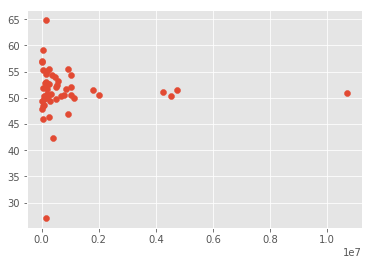

In [46]:
plt.scatter(statesData['Immigrant Population'], tweetsStates['Percentage Trump'])
plt.show()

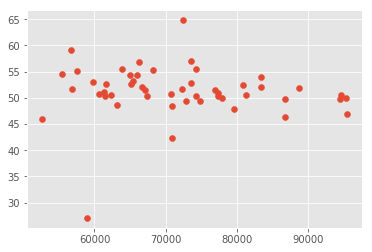

In [47]:
plt.scatter(statesData['Median Family Income'], tweetsStates['Percentage Trump'])
plt.show()

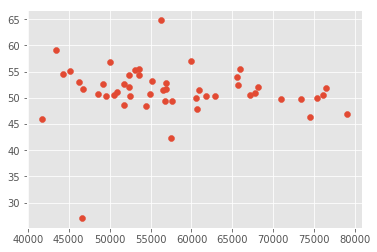

In [48]:
plt.scatter(statesData['Median Household Income'], tweetsStates['Percentage Trump'])
plt.show()

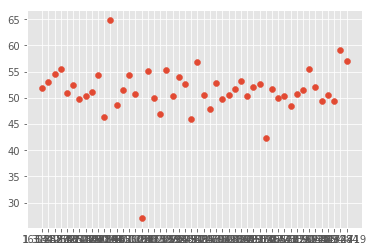

In [49]:
plt.scatter(statesData['Popular vote trump'], tweetsStates['Percentage Trump'])
plt.show()

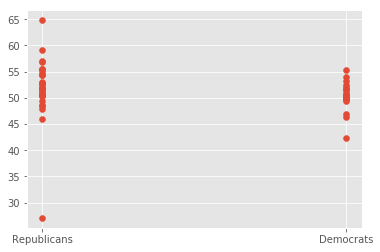

In [50]:
plt.scatter(statesData['Winning Party'], tweetsStates['Percentage Trump'])
plt.show()

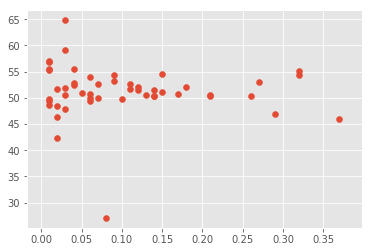

In [51]:
plt.scatter(statesData['Black'], tweetsStates['Percentage Trump'])
plt.show()

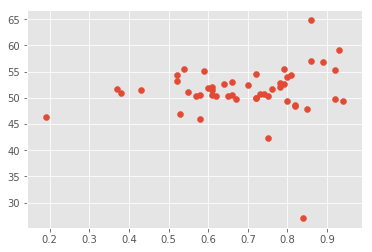

In [52]:
plt.scatter(statesData['White'], tweetsStates['Percentage Trump'])
plt.show()

## Visualize positivity in maps

### Visualize postivity in maps -- step 1: Get the state where the user is tweeting

In [53]:
#Find the states
# states= ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
# state_bucket = []
# for tweet in tweets['place']:
#     if tweet['country'] == 'United States':
#             long_text =tweet['bounding_box']['coordinates'][0][0][0]
#             lat_text  =tweet['bounding_box']['coordinates'][0][0][1]   
#         state = tweet['full_name'][-2:]
#         if any(state in s for s in states):
#             state_bucket.append(state)
#         else:
#             state_bucket.append('cleansing')

#     else:
#         state_bucket.append('No state found')

In [54]:
# tweets['long'] = pd.Series(long)
# tweets['lat'] = pd.Series(lat)
# tweets['state'] = pd.Series(state_bucket)
# tweets.drop('place',axis=1,inplace= True) ## place is niet meer nodig
# tweets.drop('in_reply_to_status_id',axis=1,inplace= True) ## in_reply_to_status_id is niet meer nodig
# tweets.drop('quoted_status_id',axis=1,inplace= True) ## quoted_status_id is niet meer nodig
# tweets.drop('entities',axis=1,inplace= True) ## entities is niet meer nodig
# tweets.drop('CleanText',axis=1,inplace= True) ## CleanText is niet meer nodig
# tweets.drop('id',axis=1,inplace= True) ## id is niet meer nodig


In [57]:
## We need the whole state name
us_state_abbrev = {
    'AL': 'Alabama',    'AK': 'Alaska',    'AZ': 'Arizona',    'AR': 'Arkansas',    'CA': 'California',    'CO': 'Colorado',    'CT': 'Connecticut',    'DE': 'Delaware',
    'FL': 'Florida',    'GA': 'Georgia',    'HI': 'Hawaii',    'ID': 'Idaho',    'IL': 'Illinois',    'IN': 'Indiana',    'IA': 'Iowa',    'KS': 'Kansas',
    'KY': 'Kentucky',    'LA': 'Louisiana',    'ME': 'Maine',    'MD': 'Maryland',    'MA': 'Massachusetts',    'MI': 'Michigan',    'MN': 'Minnesota',    'MS': 'Mississippi',
    'MO': 'Missouri',    'MT': 'Montana',    'NE': 'Nebraska',    'NV': 'Nevada',    'NH': 'New Hampshire',    'NJ': 'New Jersey',    'NM': 'New Mexico',    'NY': 'New York',
    'NC': 'North Carolina',    'ND': 'North Dakota',    'OH': 'Ohio',    'OK': 'Oklahoma',    'OR': 'Oregon',    'PA': 'Pennsylvania',    'RI': 'Rhode Island',    'SC': 'South Carolina',
    'SD': 'South Dakota',    'TN': 'Tennessee',    'TX': 'Texas',    'UT': 'Utah',    'VT': 'Vermont',    'VA': 'Virginia',    'WA': 'Washington',    'WV': 'West Virginia',
    'WI': 'Wisconsin',    'WY': 'Wyoming',
}

# tweets['state_whole'] = tweets['state'].map(us_state_abbrev)

### Visualize postivity in maps -- step 2: Which states are postive about Trump

In [58]:
# Merge the data
predicted_and_real = pd.merge(tweetsStates,statesData, how='right', left_on='State', right_on='State abbreviation')
# predicted_and_real.info()
# predicted_and_real.State_x                 
predicted_and_real =predicted_and_real[['State_x','Hillary','Trump','Percentage Hillary','Percentage Trump','Winning Party','Population','Popular vote totals','Popular vote trump','Popular vote clinton']]
predicted_and_real['Popular vote clinton'] = predicted_and_real['Popular vote clinton'].str.replace('.','').astype(int)
predicted_and_real['Popular vote trump'] = predicted_and_real['Popular vote trump'].str.replace('.','').astype(int)
predicted_and_real['Perc Trump'] =  predicted_and_real['Popular vote trump']/(predicted_and_real['Popular vote trump']+predicted_and_real['Popular vote clinton']) *100

predicted_and_real

,State_x,Hillary,Trump,Percentage Hillary,Percentage Trump,Winning Party,Population,Popular vote totals,Popular vote trump,Popular vote clinton,Perc Trump
0,AK,570,615,48.101266,51.898734,Republicans,741900,318.608,163387,116454,58.385655
1,AL,2908,3277,47.016977,52.983023,Republicans,4863300,2.123.372,1318255,729547,64.374144
2,AR,1158,1394,45.376176,54.623824,Republicans,2988200,1.130.635,684872,380494,64.285138
3,AZ,6459,8047,44.526403,55.473597,Republicans,6931100,2.573.165,1252401,1161167,51.890023
4,CA,28667,29749,49.073884,50.926116,Democrats,39250000,14.181.604,4483814,8753792,33.871789
5,CO,3554,3932,47.475287,52.524713,Democrats,5540500,2.780.247,1202484,1338870,47.316667
6,CT,2154,2129,50.291852,49.708148,Democrats,3576500,1.644.920,673215,897572,42.858452
7,DE,619,628,49.639134,50.360866,Democrats,952100,443.814,185127,235603,44.001379
8,FL,23125,24248,48.814726,51.185274,Republicans,20612400,9.420.039,4617886,4504975,50.618835
9,GA,7301,8693,45.648368,54.351632,Republicans,10310400,4.114.732,2089104,1877963,52.661173


In [59]:
import plotly.plotly as py
import plotly.tools as tls

tls.set_credentials_file(username='fundamentals_of_datascience', api_key='IGN5rHs9tuS1kNhEPwBf')

layout = dict(title ='Real percentage Republican voters',geo= dict(scope='usa',projection=dict(type='albers usa'), showlakes= True, lakecolor = 'rgb(66,165,245)',),)
predicted_and_real['text'] = predicted_and_real['State_x'] + ': ' + predicted_and_real['Perc Trump'].astype(str)

data = [dict(type='choropleth',autocolorscale=False,locations= predicted_and_real['State_x'], z=predicted_and_real['Perc Trump'], locationmode='USA-states',text =predicted_and_real['text'],
             
       colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(254,224,144)'], [0.465555555555555556, 'rgb(171,217,233)'], [0.74777777777777778, 'rgb(153,255,51)'], [0.8888888888888888, 'rgb(153,255,51)'], [1.0, 'rgb(128,255,0)']]             
           
             ,colorbar= dict(title='Percentage Republican'))]
fig = dict(data=data, layout=layout)

py.iplot(fig, filename= 'd3-choropleth-map')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~fundamentals_of_datascience/0 or inside your plot.ly account where it is named 'd3-choropleth-map'


In [60]:
import plotly.plotly as py
import plotly.tools as tls

tls.set_credentials_file(username='fundamentals_of_datascience', api_key='IGN5rHs9tuS1kNhEPwBf')

layout = dict(title ='Percentage Republican voters based on sentiment analyse',geo= dict(scope='usa',projection=dict(type='albers usa'), showlakes= True, lakecolor = 'rgb(66,165,245)',),)
predicted_and_real['text'] = predicted_and_real['State_x'] + ': ' + predicted_and_real['Percentage Trump'].astype(str)

data = [dict(type='choropleth',autocolorscale=False,locations= predicted_and_real['State_x'], z=predicted_and_real['Percentage Trump'], locationmode='USA-states',text =predicted_and_real['text'],
             
               colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], [0.74777777777777778, 'rgb(153,255,51)'], [0.8888888888888888, 'rgb(153,255,51)'], [1.0, 'rgb(128,255,0)']]             
           
#              colorscale = 'RdBu'
#               colorscale=[[0.0, 'rgb(255,0,0)'], 
#                           [0.26, 'rgb(255,51,51)'], 
#                           [0.3, 'rgb(255,102,102)'], 
#                           [0.4, 'rgb(255,153,153)'], 
#                           [0.5, 'rgb(255,204,204)'], 
#                           [0.7, 'rgb(0,204,0)'], 
#                           [0.7, 'rgb(153,255,51)'], 
#                           [0.8, 'rgb(128,255,0)'], 
#                           [0.9, 'rgb(0,255,0)'], 
#                           [1.0, 'rgb(0,204,0)']]             
             ,colorbar= dict(title='Percentage Republican'))]
fig = dict(data=data, layout=layout)

py.iplot(fig, filename= 'd3-choropleth-map')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~fundamentals_of_datascience/0 or inside your plot.ly account where it is named 'd3-choropleth-map'


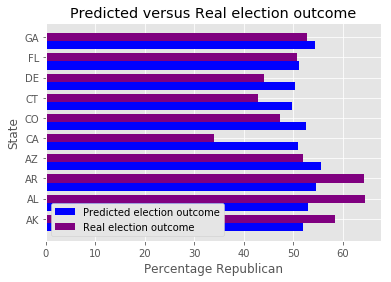

In [85]:

import matplotlib.pyplot as plt
import numpy as np

subset = predicted_and_real.iloc[:10]
ind = np.arange(len(subset))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, subset['Percentage Trump'], width, color='blue', label='Predicted election outcome')
ax.barh(ind + width,  subset['Perc Trump'], width, color='purple', label='Real election outcome')

ax.set(yticks=ind + width, yticklabels=subset.State_x) 
#        ,ylim=[width , len(subset)])
ax.legend(loc = 3,framealpha= 1 )
plt.title("Predicted versus Real election outcome")
plt.ylabel("State")
# plt.xlabel("Percentage Republican")
plt.show()

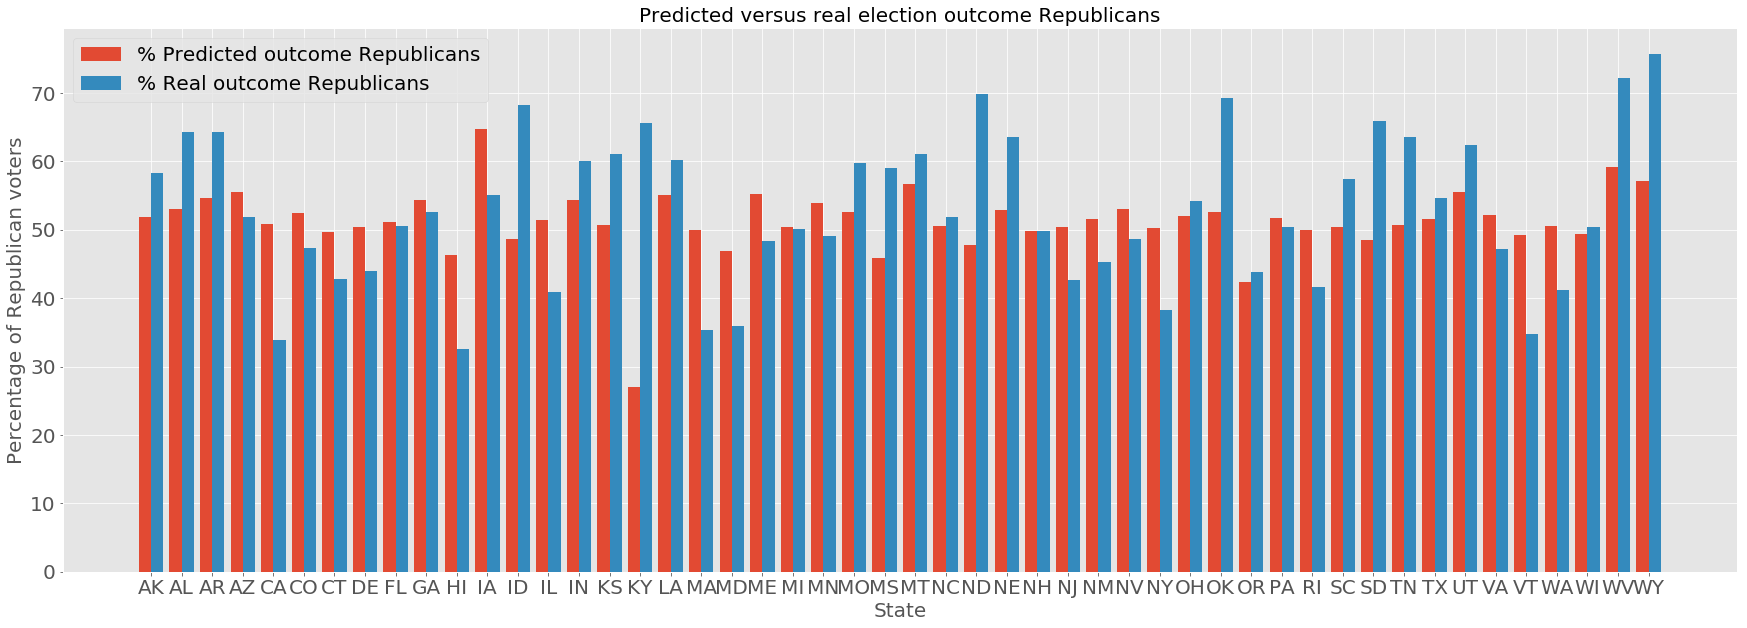

In [114]:
X = predicted_and_real['State_x']
Y = predicted_and_real['Percentage Trump']
Z = predicted_and_real['Perc Trump']
_X = np.arange(len(X))

plt.figure(figsize=(30,10))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

plt.title("Predicted versus real election outcome Republicans", size=20)
plt.xlabel("State", size=20)
plt.ylabel("Percentage of Republican voters", size=20)

plt.bar(_X - 0.2, Y, 0.4, label='% Predicted outcome Republicans')
plt.bar(_X + 0.2, Z, 0.4, label='% Real outcome Republicans')
plt.legend(loc=2, prop={'size': 20})

plt.xticks(_X, X) # set labels manually
plt.show()

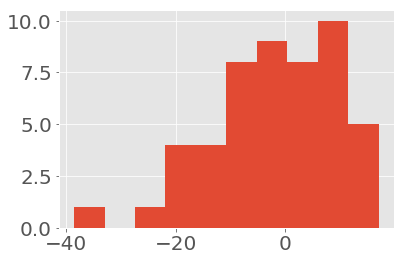

In [115]:
# predicted_and_real['Percentage Trump','Perc Trump'].apply(lambda x, y: x if x>100 and y<50 else y)
# frame[['b','c']].apply(lambda x: x['c'] if x['c']>0 else x['b'], axis=1)
# predicted_and_real[['Percentage Trump','Perc Trump']].apply(lambda x: x['Percentage Trump'] + x['Perc Trump'])
predicted_and_real['Trump gewonnen']  = predicted_and_real['Perc Trump'].apply(lambda x :1 if x > 50 else 0)
predicted_and_real['Trump gewonnen voorspeld']  = predicted_and_real['Percentage Trump'].apply(lambda x :1 if x > 50 else 0)

predicted_and_real['Goed voorspeld'] = predicted_and_real['Trump gewonnen voorspeld'] == predicted_and_real['Trump gewonnen']

predicted_and_real['Verschil'] = predicted_and_real['Percentage Trump'] - predicted_and_real['Perc Trump']
# predicted_and_real['Goed voorspeld'].sum()

(predicted_and_real['Percentage Trump'] - predicted_and_real['Perc Trump']).hist()


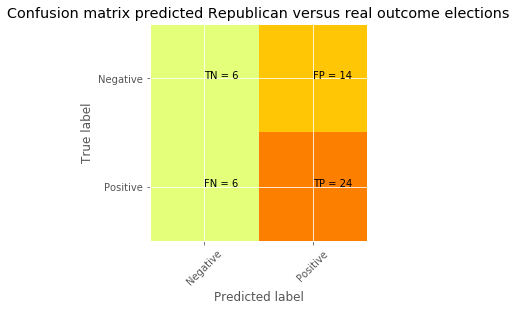

In [112]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(predicted_and_real['Trump gewonnen'], predicted_and_real['Trump gewonnen voorspeld'])
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion matrix predicted Republican versus real outcome elections')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Text(0.5,0,'Republicans')

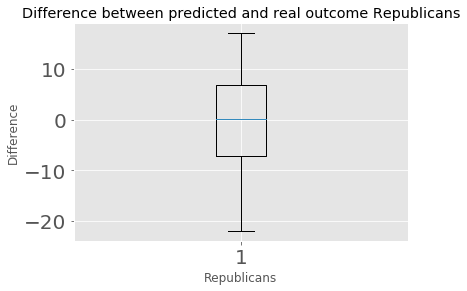

In [143]:
# predicted_and_real['Verschil']
# (predicted_and_real['Percentage Trump'] - predicted_and_real['Percentage Hillary']).sort_values()


plt.boxplot(predicted_and_real.loc[predicted_and_real['State_x'] != 'KY']['Verschil'])
plt.title('Difference between predicted and real outcome Republicans')
plt.ylabel('Difference')
plt.xlabel('Republicans')